<a href="https://colab.research.google.com/github/LosPowerPeralta/ADA-Informes-Matias/blob/main/Informe_QuickSort.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Problema de ordenamiento

Los problemas de ordenamiento desde hace mucho tiempo llevan siendo un desafío para los programadores ya que siempre se intenta buscar algún algoritmo el cual pueda resolverlos de la forma más rápida posible con el menor tiempo.

Por esta misma razón Charles Richard creo un nuevo metodo de ordenamiento llamado QuickSort. Este algoritmo fue desarrollado para "poder ordenar las palabras a ser traducidas, para volverlas más fácil de coincidir con un diccionario ya ordenado de ruso a inglés" (Universidad Autonoma de Baja California 2015).

Entrada: una secuencia de n números $[a_1, a_2,...,a_n]$

Salida: Retorna una secuencia de n números ordenada de menor a mayor donde $a'_1 \leq a'_2 \leq ... \leq a'_n$.



#2. QuickSort

##2.1. Descripción del algoritmo

El QuickSort es un algortimo de ordenamiento originalmente recursivo el cual consiste en dividir el arreglo en 2 partes con la ayuda de un pivote, donde este tendrá una función identica a la de un punto de referencia, ya que la idea es que todos los datos menores a él queden en el lado izquierdo y los datos mayores al lado derecho, esto se realizará con la ayuda de la función Partition la cual se encargará de hacer estos cambios para poder ir oredenando estos datos poco a poco. Lo ideal es que este pivote sea la mediana de todos los datos ubicados dentro de nuestro arreglo y por esta razón existen varias formas matemáticas para dar con ese dato como podría ser calcular la media aritmetica de tres números aleatorios ubicados en el arreglo, elegir el dato posicionado en el medio del array o elegir un dato aleatorio entre otros.

##2.2. Codigo

In [5]:
import random as rd
import matplotlib.pyplot as plt
import datetime
import math as mt
from timeit import repeat
from termcolor import colored

In [32]:
def partition(A, start, end, type_P, cont, verbose):
    if verbose:
      print("Función", colored(f"Patition()", "yellow"))
      print("Entrada:", colored(f"{str(A[start:end + 1])}", "red"), "\n")

    i = start
    if type_P == 0:
      pivot = (A[rd.randint(0,end)]+A[rd.randint(0,end)]+A[rd.randint(0,end)])//3
    elif type_P == 1:
      pivot = start 
    elif type_P == 2:
      pivot = end 
    j = i

    if verbose:
      print("Posición de nuestro pivote:", colored(f"{pivot}", "blue"), ", valor:", colored(f"{A[pivot]}", "blue"))
      print("Se intercambia el valor del pivote con la última posición.\n")

    A[end] , A[pivot] = A[pivot], A[end] 
    pivot = end

    if verbose:
      print("Arreglo resultante:", colored(f"{str(A[start:end + 1])}", "blue"))
    

    while j < end:
      cont += 1
      if verbose:
          print("Valor posición inicial (i):", colored(f"{i}", "green"))
          print("Valor posición final: (j)", colored(f"{j}", "green"), "\n")
          print(colored(f"{A[j]}", "red"), "<", colored(f"{A[pivot]}", "red"), "?")

      if A[j] < A[pivot]:
          if verbose:
            print("swap entre", colored(f"{A[i]}", "magenta"), "y", colored(f"{A[j]}", "magenta"))
          A[i], A[j] = A[j], A[i]
          i += 1
      
      j += 1
    cont += 1

    if verbose:
      print("\nSe intercambia el pivote con la posición i")

    A[i], A[pivot] = A[pivot], A[i]
    pivot = i

    if verbose:
      print("Arreglo resultante:", colored(f"{str(A[start:end + 1])}", "blue"))
      print("Fin Función",colored(f"Partition", "yellow"), "\n")

    return pivot, cont


In [10]:
def quickSort(A, start, end, type_P = 0, cont = 0, verbose = False):
    if verbose:
      print("Función", colored(f"QuickSort()", "yellow"))
      print("Entrada:", colored(f"{str(A[start:end + 1])}", "red"), "\n")

    if start < end:
        p, cont = partition(A, start, end, type_P, cont, verbose) # p is pivot, it is now at its correct 
        
        if verbose:
          print("Primera Mitad:", colored(f"{str(A[start:p])}", "blue"))
          print("Segunda Mitad:", colored(f"{str(A[p + 1:end + 1])}", "blue"), "\n")

        cont = quickSort(A, start, p - 1, type_P, cont, verbose)
        cont = quickSort(A, p+1, end, type_P, cont, verbose)
    
    if verbose:
      print("Salida:", colored(f"{A[start:end + 1]}", "blue"))
      print("Fin Función", colored(f"QuickSort", "yellow"), "\n")

    return cont

##2.3. Ejemplo

Empezamos considerando el siguiente arreglo.

$A = [2,5,4,8,1]$

Lo primero que realiza el algoritmo viene siendo llamar a la función Partition(), luego está función busca el pivote(r) para llevar a cabo los calculos que en este caso será el medio del arreglo (r = 4), además la función partition define 2 variables más, "i" que viene siendo la posición inicial del arreglo y "j" que es la posición final.

Entonces a partir de este punto nos preguntamos si el primer dato (i = 0) es menor al pivote (r = 4).

$A[i] < r$?, osea $2 < 4$?

Como esto es verdad i aumenta en 1 (i = 1) y esto se realiza constantemente hasta encontrar un elemento mayor o igual.

$A[i] < r$, osea $5 < 4$?

Como aquí nos encontramos con una falsedad, el valor de "i" deja de aumentar y ahora se empieza a verificar el lado derecho de nuestro arreglo, dejando unicamente a los datos mayores al pivote en este lado, con $"j" = len(A) - 1$, osea $"j" = 4$.

$A[j] > r$, osea $1 > 4$.

Como en este caso es falso se realiza un "swamp" (cambio de datos) dentro del arreglo en la posición i y j quedando el siguiente arreglo.

$A = [2,1,4,8,5]$

Luego de hacer el último recorrido la función partition detecta que todos los números menores al pivote se encuentran en la parte derecha y los mayores en la izquierda, por lo tanto ahora esta función retorna la posición del pivote para que la función QuickSort se llame recursivamente y ordenar los datos que se encuentran a los lados del pivote anterior. Esto lo realizará constantemente hasta que el arreglo se encuentre ordenado.

$[2,1,4]...[8,5]$

para el arreglo $[2,1,4]$.

$r=1 , i=0 , j=2$

$A[i] < r$, osea $2 < 1$.

Como es falso se verifica con el lado derecho.

$A[j] > r$, osea $4 > 1$.

Como es verdadero j disminuye en 1 $(j=1)$.

$A[j] > r$, osea $1 > 1$

Como es Falso se realiza el swamp quedando el siguiente arreglo.

$A = [1,2,4,8,5]$

Ahora se verifica el otro arreglo $[8,5]$.

$r=8 , i=3 , j=4$

$A[i] < r$, osea $8 < 8$.

Como es falso se verifica el lado derecho.

$A[j] > r$, osea $8 > 5$.

Como es verdadero j disminuye en 1.

$A[j] > r$, osea $8 > 8$.

Como es Falso se realiza un swamp entre los valores y luego de hacer ese cambio entre los valores se retorna la posición del pivote ya que $i=j$.

Array resultante $A = [1,2,4,5,8]$.

Apesar de que el arreglo ya se encuentre ordenado este seguirá llamandose recursivamente hasta que la posición inicial sea mayor o igual a la posición final que reciba la función ($j \leq i$).



##2.4. Ejecución del algoritmo paso a paso (Verbose = True)

In [33]:
A = [1,2,3,4,5]
cont = quickSort(A, 0, len(A) - 1, 0,verbose= True)

Función QuickSort()
Entrada: [1, 2, 3, 4, 5] 

Función Patition()
Entrada: [1, 2, 3, 4, 5] 

Posición de nuestro pivote: 3 , valor: 4
Se intercambia el valor del pivote con la última posición.

Arreglo resultante: [1, 2, 3, 5, 4]
Valor posición inicial (i): 0
Valor posición final: (j) 0 

1 < 4 ?
swap entre 1 y 1
Valor posición inicial (i): 1
Valor posición final: (j) 1 

2 < 4 ?
swap entre 2 y 2
Valor posición inicial (i): 2
Valor posición final: (j) 2 

3 < 4 ?
swap entre 3 y 3
Valor posición inicial (i): 3
Valor posición final: (j) 3 

5 < 4 ?

Se intercambia el pivote con la posición i
Arreglo resultante: [1, 2, 3, 4, 5]
Fin Función Partition 

Primera Mitad: [1, 2, 3]
Segunda Mitad: [5] 

Función QuickSort()
Entrada: [1, 2, 3] 

Función Patition()
Entrada: [1, 2, 3] 

Posición de nuestro pivote: 2 , valor: 3
Se intercambia el valor del pivote con la última posición.

Arreglo resultante: [1, 2, 3]
Valor posición inicial (i): 0
Valor posición final: (j) 0 

1 < 3 ?
swap entre 1 y 1


#3. Tiempo de ejecución

##Teorema (Tiempo de ejecución).

El tiempo de ejecución en el mejor caso y caso promedio del QuickSort viene siendo $O(nlogn)$ y el de su peor caso está dado por $O(n^2)$.

###**Árbol de recurrencia**

Para poder entender la complejidad temporal de forma intuitiva se puede hacer uso del árbol recursivo, el cual nos mostrará explicitamente la cantidad de operaciones que necesitaremos realizar en nuestro algoritmo.

Para esto definiremos 3 funciones asintoticas que serían las siguientes:

> Para el mejor caso:
>  $T(n) = \begin{cases}
  c  & n \text{ is small} \\
  2 T(n/2) + c \cdot n & \text{ otherwise}
\end{cases}$

> Para el caso Promedio: 
> $T(n) = \begin{cases} 
  c  & n \text{ is small} \\
  2 T(3n/4) + c \cdot n & \text{ otherwise}
  \end{cases}$

> Para el peor Caso: 
> $T(n) = \begin{cases}
  c & n \text{ is small} \\
  T(0) + T(n - 1) + c \cdot n & \text{ otherwise}
  \end{cases}$

Y ahora con las funciones definidas podemos empezar a crear los árboles de la siguiente manera.

####**Para el mejor caso:**

La función recibirá el arreglo con su largo completo y luego este será dividido en 2 gracias a las dos llamadas recursivas.


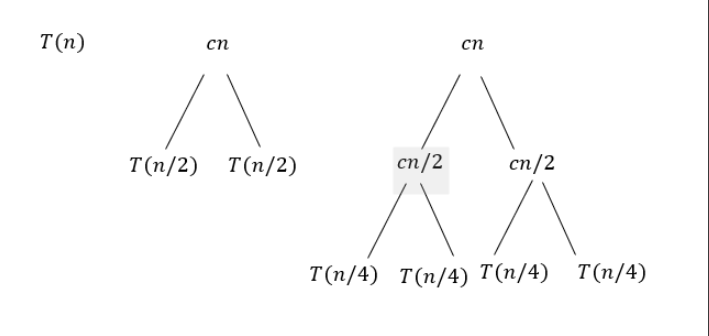

Hasta conseguir el siguiente árbol y los valores aproximados de sus operaciones.


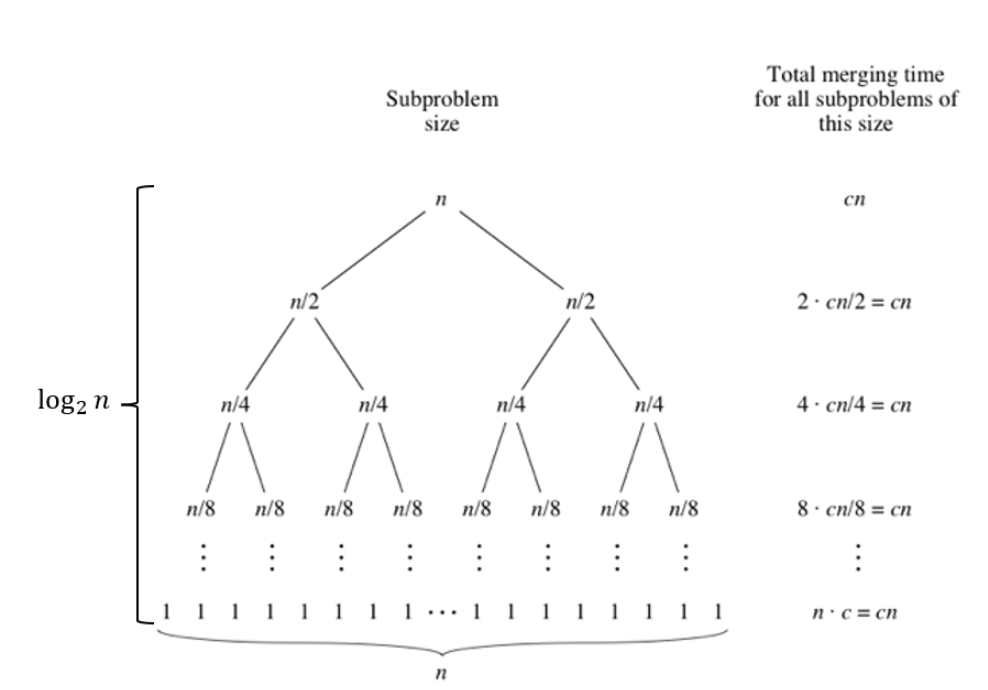

Finalmente analizando el árbol de recursión podemos decir que la suma de todos los tiempos de ejecución es: $cn \log_2 n \rightarrow O(n \log n)$.

####**Para el caso promedio**

Este caso se considera ya que normalmente es difícil conseguir siempre la mediana entre los datos para llegar al mejor caso. Por esta misma razón consideraremos que el caso promedio será conseguir datos que dividan nuestro arreglo en una razón de 3:1.

Considerando la función definida anteriormente para el caso promedio y empezando a armar el árbol de la misma manera que en el caso anterior, este nos quedaría tal que así.



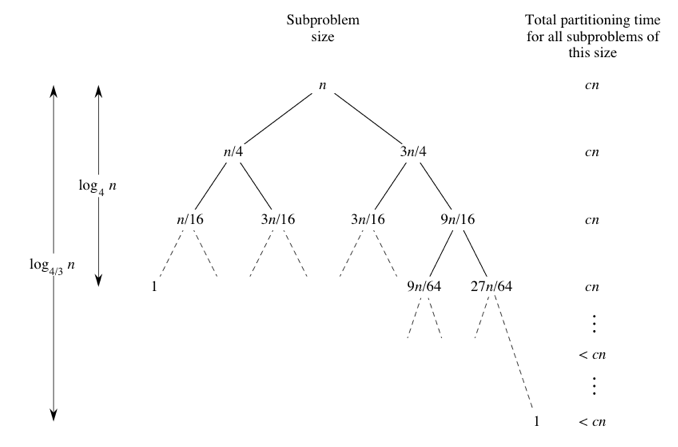

Como podemos apreciar en la siguiente imagen, si hacemos las sumas de todas sus operaciones nos quedará la siguiente aproximación de su tiempo de ejecución: $cn \cdot log_\frac{4}{3}n → O(nlogn)$.

Por lo tanto podemos concluir que el tiempo de ejecución del mejor caso y caso promedio son aproximadamente identicos.

####**Para el peor caso**

El peor caso ocurre cuando nuestro pivote toma el valor mayor de nuestro arreglo para empezar a ordenarlo, en este ejemplo consideraremos que el pivote se encuentra en el final de un arreglo ordenado.

Considerando la función definida anteriormente, el árbol para este caso nos quedaría tal que así.

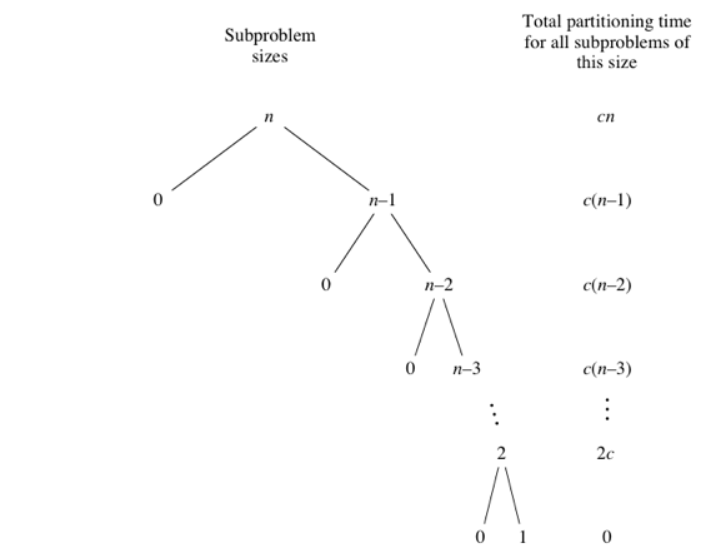

Como podemos apreciar en la siguiente imagen, la suma de sus operaciones nos dará el siguiente tiempo de ejecución: $cn+c(n-1)+c(n-2)+...+2c = c(\sum\limits_{i=0}^{n}(n-i)-1)$, osea $c(\frac{n(n+1)}{2}-1) →O(n^2)$

##Prueba del teorema

Para comprobar el teorema haremos uso del siguiente codigo que comprará la cantidad de comparaciones realizadas por el algoritmo en su caso promedio y el peor caso junto a la aproximación matemática del tiempo de ejecución.



In [34]:
for n in range(1,15):
  x1 = rd.sample(range(1,100), n)
  x2 = [i for i in range(1, n + 1)]
  cont1 = quickSort(x1,0,len(x1) - 1, 0)
  cont2 = quickSort(x2, 0, len(x2) - 1, 2)

  print(n,".-")
  print(" Caso Promedio:", x1)
  print("   Comparaciones =", cont1, ", Aproximación matemática =", (n * mt.log2(n)) // 1, "\n")
  print(" Peor caso:", x2)
  print("   Comparaciones =", cont2, ", Aproximación matemática =", ((n * (n + 1)) // 2) - 1, "\n")

1 .-
 Caso Promedio: [45]
   Comparaciones = 0 , Aproximación matemática = 0.0 

 Peor caso: [1]
   Comparaciones = 0 , Aproximación matemática = 0 



IndexError: ignored

Como podemos apreciar en los resultados lanzados por el codigo, se puede ver una aproximación entre las comparaciones del algoritmo y de la aproximación matemática, confirmando que la complejidad del peor caso es $O(n^2)$ y la del caso promedio $O(nlogn)$.

#4. Correctitud

**Teorema de (Correctitud)**

El algoritmo QuickSort recibe una secuencia de $n$ números $[a_1,a_2,...,a_n]$ y retorna una la misma secuancia de números ordenados de menor a mayor: $a'_1 \leq a'_2 \leq ... \leq a'_n$.

##Prueba del teorema

Previamente obsevarmos que el algoritmo se llama constantemente de forma recursiva y además hace uso de una función auxiliar para poder ordenar los datos llamada "partition".

Por esta misma razón se realizará la prueba de correctitud de la función QuickSort con la ayuda de la inducción matemática y al final utilizaremos la propiedad del bucle invariante para demostrar la correctitud de la función partition.

##Prueba del teorema (Función QuickSort)

